In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import pathlib
import os
import sys
sys.path.insert(1,'CHIME/modified/chime_ap')
sys.path.insert(1,'IHME')

import data_import as chime
from ihme import ihme

In [2]:
#CHIME
df_chime = chime.main('Simulator - Test Sheet - Sample Data.csv').raw_df
last_date = df_chime.date.tolist()[-1]

2020-06-08 22:23:16,587 - sir - INFO - Using doubling_time: 5
2020-06-08 22:23:17,056 - sir - INFO - Estimated date_first_hospitalized: 2020-04-27; current_date: 2020-06-08; i_day: 42
2020-06-08 22:23:17,066 - sir - INFO - len(np.arange(-i_day, n_days+1)): 73
2020-06-08 22:23:17,066 - sir - INFO - len(raw_df): 73


In [3]:
#IHME
inst_ihme = ihme(user_df='Simulator - Test Sheet - Sample Data 2 - necessary for IHME.csv',
                region_df='Simulator - Test Sheet - Sample Data.csv')
df_ihme = inst_ihme.predict(future=30)

2020-06-08 22:23:17,476 - numexpr.utils - INFO - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-06-08 22:23:17,477 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


In [4]:
#Neher Lab
df_neher = pd.read_csv('neher-lab/c19s.results.summary.tsv','\t')
df_neher.time = pd.to_datetime(df_neher.time)

In [5]:
#Importing file containing all countries
file = sorted(pathlib.Path('IHME/data').iterdir(), key=os.path.getmtime)[-1]
df_all = pd.read_csv('IHME/data/'+file.name)
df_all = df_all[['Date_reported','Country','Cumulative_cases','Cumulative_deaths']]
df_all.columns = ['date','group','cum_cases','cum_deaths']
df_all.date = pd.to_datetime(df_all.date)
df_all = df_all[df_all.group==df_ihme.group.unique()[0]]

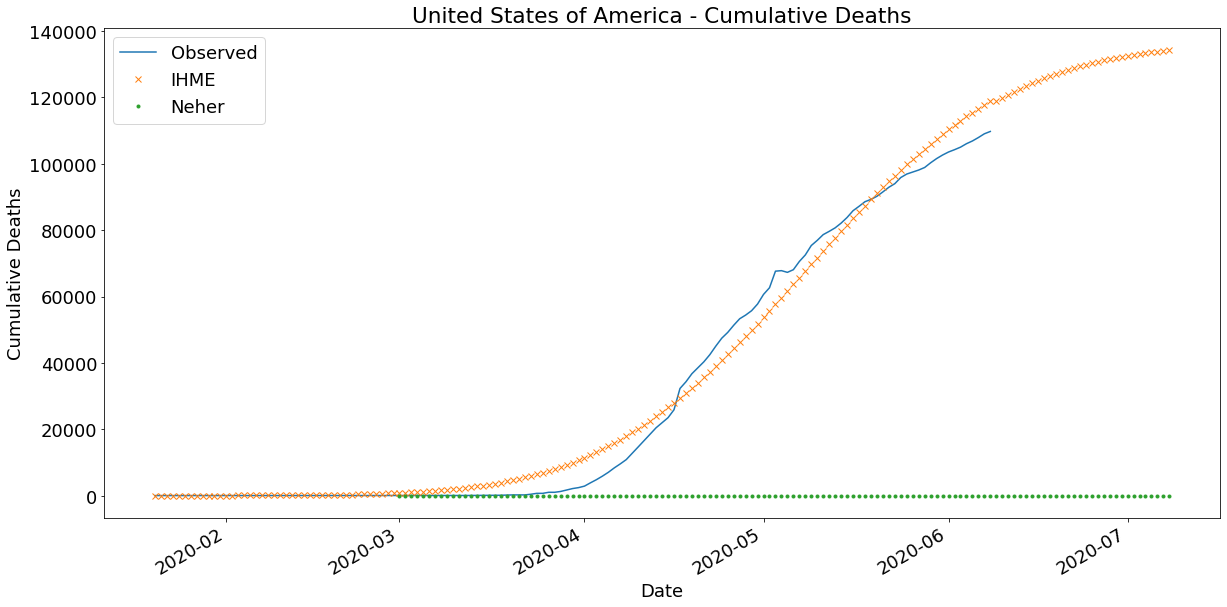

In [10]:
#Plot cumulative deaths
fig = plt.figure(figsize=(20,10))
plt.plot(df_ihme[df_ihme.date<=last_date].date, df_ihme[df_ihme.date<=last_date].cum_deaths, '-', label='Observed')
plt.plot(df_ihme[df_ihme.date<=last_date].date, df_ihme[df_ihme.date<=last_date].pred, 'x', label='IHME')
plt.plot(df_neher[df_neher.time<=last_date].time, 
         df_neher[df_neher.time<=last_date]['cumulative fatality (total) median'], '.', label = 'Neher')

plt.xlabel("Date")
plt.ylabel("Cumulative Deaths")
plt.title(df_ihme.group.unique()[0] + " - Cumulative Deaths")
plt.legend()
plt.rcParams.update({'font.size': 18})
fig.autofmt_xdate()
plt.savefig('plots/cum_deaths.png')

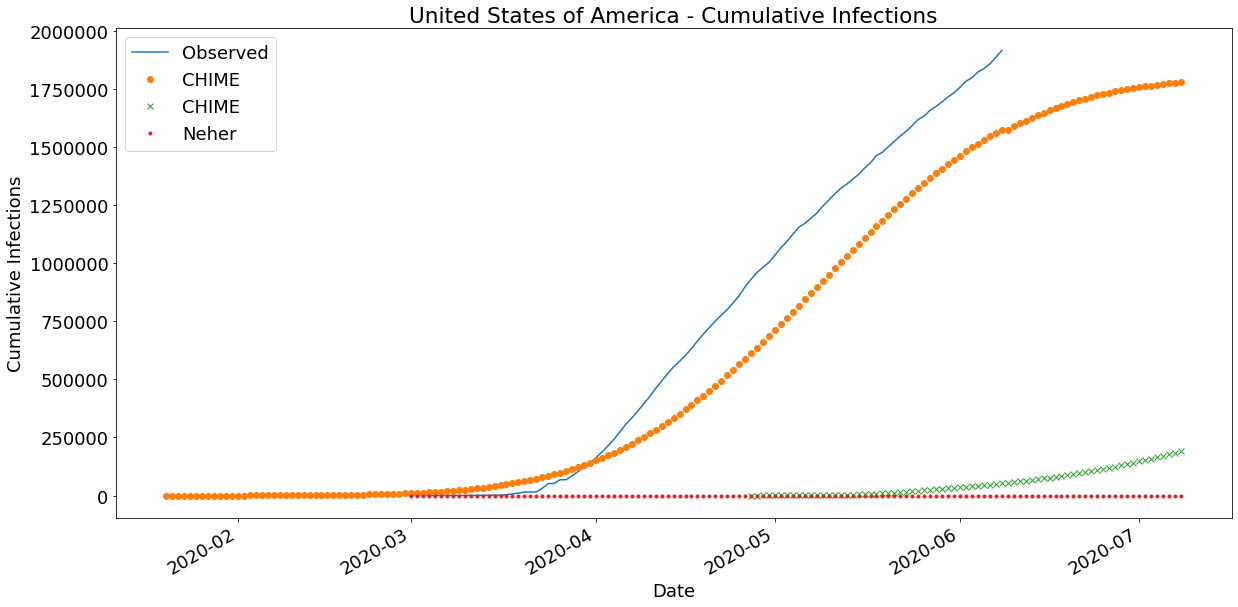

In [11]:
#Plot cumulative infections
fig = plt.figure(figsize=(20,10))
if df_all.shape[0]>0:
    plt.plot(df_all[df_all.date<=last_date].date, df_all[df_all.date<=last_date].cum_cases, '-', label='Observed')
plt.plot(df_ihme.date, df_ihme.infected, 'o', label='IHME')
plt.plot(df_chime.date, df_chime.ever_infected, 'x', label='CHIME')
plt.plot(df_neher[(df_neher.time<=last_date)].time, 
         df_neher[(df_neher.time<=last_date)]['infectious (total) median'], '.', label = 'Neher')#Not the correct column!

plt.xlabel("Date")
plt.ylabel("Cumulative Infections")
plt.title(df_ihme.group.unique()[0] + " - Cumulative Infections")
plt.legend()
plt.rcParams.update({'font.size': 18})
fig.autofmt_xdate()
plt.savefig('plots/cum_infections.png')

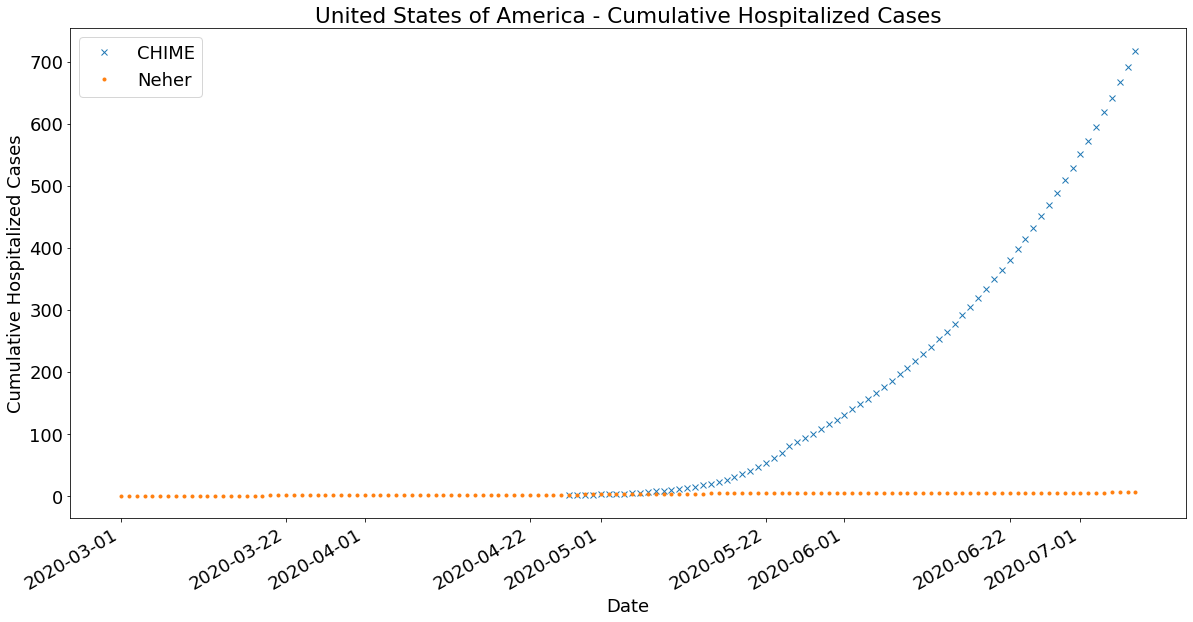

In [12]:
#Plot cumulative hospitalized cases
fig = plt.figure(figsize=(20,10))
plt.plot(df_chime.date, df_chime.ever_hospitalized, 'x', label='CHIME')
plt.plot(df_neher[(df_neher.time<=last_date)].time, 
         df_neher[(df_neher.time<=last_date)]['cumulative hospitalized (total) median'], '.', label = 'Neher')

plt.xlabel("Date")
plt.ylabel("Cumulative Hospitalized Cases")
plt.title(df_ihme.group.unique()[0] + " - Cumulative Hospitalized Cases")
plt.legend()
plt.rcParams.update({'font.size': 18})
fig.autofmt_xdate()
plt.savefig('plots/cum_hospitalized.png')

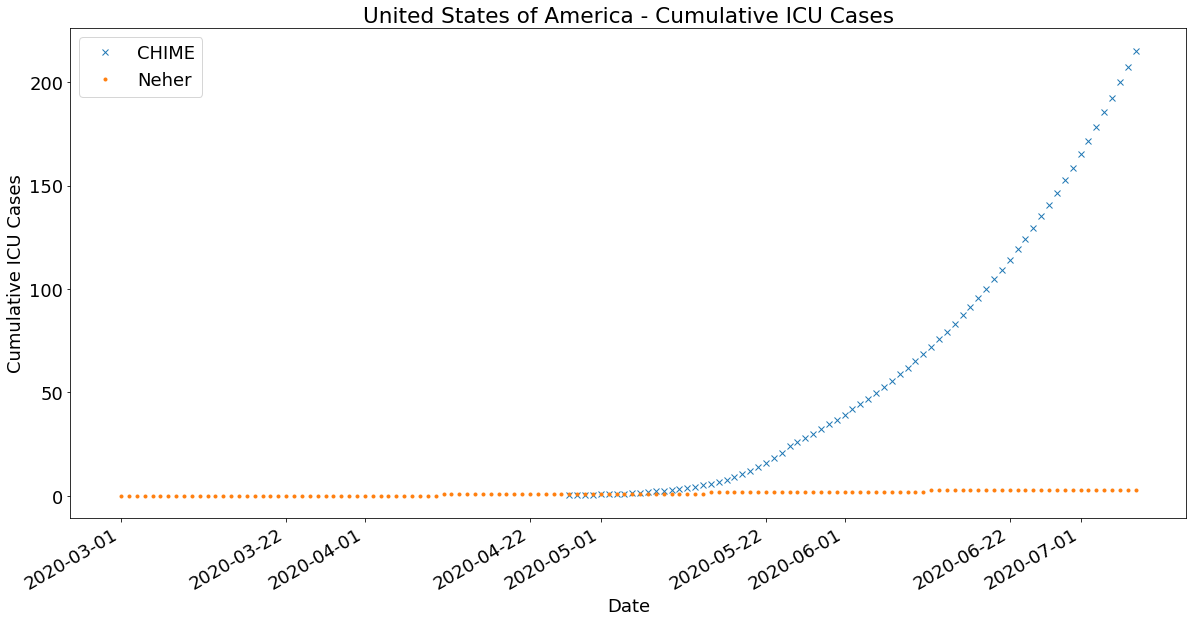

In [13]:
#Plot cumulative icu cases
fig = plt.figure(figsize=(20,10))
plt.plot(df_chime.date, df_chime.ever_icu, 'x', label='CHIME')
plt.plot(df_neher[(df_neher.time<=last_date)].time, 
         df_neher[(df_neher.time<=last_date)]['cumulative ICU (total) median'], '.', label = 'Neher')

plt.xlabel("Date")
plt.ylabel("Cumulative ICU Cases")
plt.title(df_ihme.group.unique()[0] + " - Cumulative ICU Cases")
plt.legend()
plt.rcParams.update({'font.size': 18})
fig.autofmt_xdate()
plt.savefig('plots/cum_icu.png')